# Assignment 3
Realfagslektormaster, programing course

Author: Paul Knutson

## Error approximations
> Since errors approximations are not asked for in all the tasks, these are not included generally.

When performing estimations using numerical methods, error approxmations can be needed to evaluate how many iterations are neccessary, how fast different methods converge towards the correct value (or indeed if they at all do).

Absolute errors are the absolute difference beteen the estimate and the correct answer.



If you get a question, where the answer is $10000$, and you guess $9000$, it is $1000$ off, and $90%$ or $0.9$ of the right answer. In this example, $1000$ is the absolute error and $1 - 0.9$ is the relative error. Depending on the context, either of these can be interesting.

The absolute error is found by:
$$ \epsilon_a = |x - \widetilde{x}| $$

The relative error can be found like this:
$$ \epsilon_r = \frac{\epsilon_a}{|x|} = |\frac{x - \widetilde{x}}{x}| $$

Where $\widetilde{x}$ is the approximation of $x$.

### Error example
You are asked to estimate the amount of citizens in a town of $10000$.
You guess $9000$.

The absolute error is
$$ \epsilon_a = |x - \widetilde{x}| = |10000 - 9000| = 1000 $$


While the relative error is
$$ \epsilon_r = \frac{\epsilon_a}{|x|} = \frac{1000}{|10000|} = \frac{1000}{10000} = \frac{1}{10} = 0.1 $$

And for good measures, the percent error is
$$ \epsilon_p = 100 \% \times \epsilon_r = 100 \% \times 0.1 = 10 \% $$

## 1a
Take advantage of Newton's method for finding $f(x) = 0$ for $(i)$, $(ii)$ and $(iii)$.

Newtons method uses the following iterative process to better an estimation of the $x$ value of the $x$ intersection.

$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

The examples has been ran through 100 iterations, but much less will usually suffice quite well, depending on the required accuracy.

In [31]:
def newtons_method(f, df, x):
    for i in range(100):
        x = x - f(x) / df(x)
    return x

### $(i)$
$$ f(x) = x^4 -5x^2 - 2x + 3 $$

In [32]:
def f(x):
    return x**4 - 5*x**2 - 2*x + 3

def df(x):
    return 4*x**3 - 10*x - 2

x = newtons_method(f, df, 0)
print("(x, y) : (" + str(x) + ", " + str(f(x)) + ")")

(x, y) : (-1.6180339887498953, 0.0)


### $(ii)$
$$ f(x) = ln(x^3 + 1) - \frac{-x^2}{2} $$

In [33]:
import numpy as np

def f(x):
    return np.log(x**3 + 1) - x**2/2

def df(x):
    return x*(3*x/(x**3 + 1) - 1)

x = newtons_method(f, df, 1)
print("(x, y) : (" + str(x) + ", " + str(f(x)) + ")")

(x, y) : (0.5379893080326862, 0.0)


### $(iii)$
$$ f(x) = cos \bigg( \frac{e^{sin(x)}}{x^3 + 1} - x^2 \bigg) -\frac{1}{2}, -1 < x \leq \pi $$


In [34]:
import numpy as np

def f(x):
    return np.cos(np.e**np.sin(x)/(x**3 + 1)) - 1/2

def df(x):
    return -(np.e**np.sin(x)*(-3*x**2 + (1 + x**3)*np.cos(x))*np.sin(np.e**np.sin(x)/(1 + x**3)))/(1 + x**3)**2

x = newtons_method(f, df, 1)
print("(x, y) : (" + str(x) + ", " + str(round(f(x), 4)) + ")")

##  Med x=-1 får du problemer grunnet at både f og df
##  har nevnere x^3 + 1. Hvis x=-1 får du
##  (-1)^3 + 1 = -1 + 1 = 0. Deling på 0 er ikke definert,
##  og f og df er derfor ikke definert når x=-1.

(x, y) : (1.098905135152622, -0.0)


$(ii)$ and $(iii)$ are both problematic at $x = -1$ as $g(x) = x^3 + 1$ becomes $0$. 
$$ g(-1) = (-1)^3 + 1 = -1 + 1  = 0 $$
Neither $\frac{x}{y}$ nor $ln(y)$ are well defined when $y = 0$.

## 1b
Stationary points are points where the lines are horizontal. I.e. $f'(x) = 0$.
We know how to find a functions $x$ intersections, as we have already done it in 1a.
If we set $f'(x) = g(x)$, all we need to do is find $g'(x) = f''(x)$ (the function's double derivatives), and run it through the same function.

### $(i)$
$$ f(x) = ln(x^3 + 1) - \frac{-x^2}{2} $$

$$ g(x) = f'(x) = 4x^3 - 10x - 2 $$

$$ g'(x) = f''(x) = 12x^2 - 10 $$

In [35]:
def g(x):
    return 4*x**3 - 10*x - 2


def dg(x):
    return 12*x**2 - 10


print(newtons_method(g, dg, 0))

-0.20336421379690506


### $(ii)$
$$ f(x) = ln(x^3 + 1) - \frac{-x^2}{2} $$

$$ g(x) = f'(x) = x \bigg( \frac{3x}{x^3 + 1} - 1 \bigg) $$

$$ g'(x) = f''(x) = \frac{x^6 + 3x^4 + 2x^3 - 6x + 1}{(x^3 + 1)^2} $$

In [37]:
def g(x):
    return x*( (3*x)/(x**3 + 1) -1)


def dg(x):
    return (x**6 + 3*x**4 + 2*x**3 - 6*x + 1) / (x**3 + 1)**2


print(newtons_method(g, dg, 0))

0.0


### $(iii)$
$$ f(x) = cos \bigg( \frac{e^{sin(x)}}{x^3 + 1} - x^2 \bigg) -\frac{1}{2}, -1 < x \leq \pi $$

$g(x)$ and $g'(x)$ will be found using another method, as the differentiation would take a long time and ain't nobody got time for that.

In [38]:
print("Solution")

Solution


To find all points (both $x$ intersections and stationary points), run the functions systematically with all values of $x$ (or $x_0$.
Then make a list of uniques (after rounding off).

In [45]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 2a
The continued fraction $\frac{1}{2 + \frac{3}{4 + \frac{5}{6}}}$ can be shortened to $\frac{29}{76}$. Proof below.

$$ \frac{1}{2 + \frac{3}{4 + \frac{5}{6}}}
=
\frac{1}{2 + \frac{3}{\frac{4 \times 6}{1 \times 6} + \frac{5}{6}}}
=
\frac{1}{2 + \frac{3}{\frac{24}{6} + \frac{5}{6}}}
=
\frac{1}{2 + \frac{3}{\frac{24 + 5}{6}}}
=
\frac{1}{2 + \frac{3}{\frac{29}{6}}}
=
\frac{1}{2 + \frac{3 \times 6}{29}}
=
\frac{1}{2 + \frac{18}{29}}
=
\frac{1}{\frac{2 \times 29}{1 \times 29} + \frac{18}{29}}
=
\frac{1}{\frac{58}{29} + \frac{18}{29}}
=
\frac{1}{\frac{58 + 18}{29}}
=
\frac{1}{\frac{76}{29}}
=
\frac{29}{76}
\simeq
0.38157894736 $$

In [93]:
print(1/(2 + 3/(4 + 5/6)))

0.3815789473684211


In [94]:
a = 5/6
b = 4 + a
c = 3/b
d = 2 + c
e = 1/d

print(e)

0.3815789473684211


In [95]:
def recursive_fraction(max_val, i=0):
    if i >= max_val:
        return max_val
    
    return i + (i+1)/recursive_fraction(max_val, i+2)


print(recursive_fraction(6))

0.3815789473684211


In [104]:
import math

def continued_fraction(nums, i=0):
    if i >= len(nums) -1:
        return 1/nums[i]
    
    return nums[i] + 1/continued_fraction(nums, i+1)

## 2d
$$ \sqrt{2} \simeq [1,2,2,2,2,2,2,2, ...] $$

In [105]:
print("x:\t", math.sqrt(2))
print("x_est:\t", continued_fraction([1,2,2,2,2,2,2,2,2]))
print("e_r:\t", abs(1 - math.sqrt(2)/continued_fraction([1,2,2,2,2,2,2,2,2])))

x:	 1.4142135623730951
x_est:	 1.4142091152815013
e_r:	 3.1445785109163182e-06


## 2e
$$ \sqrt{3} \simeq [1,1,2,1,2,1,2,1,2,1, ...] $$

In [98]:
print("x:\t", math.sqrt(3))
print("x_est:\t", continued_fraction([1,1,2,1,2,1,2,1,2 ]))
print("e_r:\t", abs(1 - math.sqrt(3)/continued_fraction([1,1,2,1,2,1,2,1,2])))

x:	 1.7320508075688772
x_est:	 1.7318840579710146
e_r:	 9.628219458179821e-05


## 2f
$$ \pi\simeq [3,7,15,1,292,1,1,1,2, ...] $$

In [99]:
print("x:\t", math.pi)
print("x_est:\t", continued_fraction([3,7,15,1,292,1,1,1,2])) #.. ,1,3,1]))
print("e_r:\t", abs(1 - math.pi/continued_fraction([3,7,15,1,292,1,1,1,2])))

x:	 3.141592653589793
x_est:	 3.141592653532386
e_r:	 1.827316076230545e-11


## 2x (bonus)
$$ e \simeq [2,1,2,1,1,4,1,1,6,1,1,8, ...] $$

In [100]:
print("x:\t", math.e)
print("x_est:\t", continued_fraction([2,1,2,1,1,4,1,1,6,1,1,8]))
print("e_r:\t", abs(1 - math.e/continued_fraction([2,1,2,1,1,4,1,1,6,1,1,8])))

x:	 2.718281828459045
x_est:	 2.718283229343921
e_r:	 5.153564798243693e-07


$$ \phi\simeq [1,1,1,1,1,1,1,1,1,1,1, ...] $$

In [101]:
golden_ratio = (1 + math.sqrt(5))/2
print("x:\t", golden_ratio)
print("x_est:\t", continued_fraction([1,1,1,1,1,1,1,1,1,1,1,1,1,1]))
print("e_r:\t", abs(1 - golden_ratio/continued_fraction([1,1,1,1,1,1,1,1,1,1,1,1,1,1])))

x:	 1.618033988749895
x_est:	 1.6180371352785146
e_r:	 1.9446578518600433e-06


In [106]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 2g
What?

## 3a

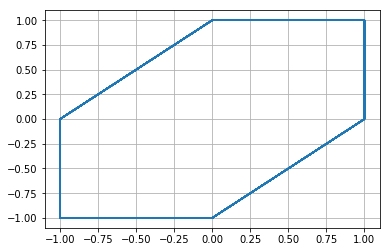

In [109]:
a = 1
b = -1
c = 1
d = 0

def F(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]

def F2(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]


X = [1]
Y = [1]


for i in range(100):
    point = F2([X[i], Y[i]])
    #points.append(F(points[i]))
    X.append(point[0])
    Y.append(point[1])


# Plotting
import matplotlib.pyplot as plt

plt.grid()
plt.plot(X, Y)
plt.show()

## 3b
$d \in [-0.5, 0.5]$

## 3c

## 3d

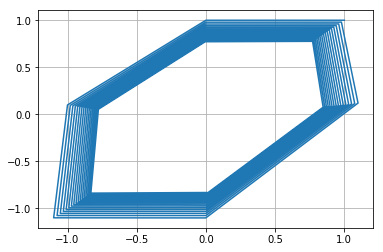

In [108]:
a = 1
b = -1
c = 1
d = 0
e = -0.1
f = 0.1

def F(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y
    
    return [xn, yn]

def F2(point):
    x = point[0]
    y = point[1]
    
    xn = a*x + b*y
    yn = c*x + d*y + e*x**2 + f*y**2
    
    return [xn, yn]


X = [1]
Y = [1]


for i in range(100):
    point = F2([X[i], Y[i]])
    #points.append(F(points[i]))
    X.append(point[0])
    Y.append(point[1])


# Plotting
import matplotlib.pyplot as plt

plt.grid()
plt.plot(X, Y)
plt.show()